In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# 1. Data Cleaning

In [41]:
df = pd.read_csv(r"C:\Users\muham\OneDrive\Dokumen\DataAnalisis\data\rfm3.csv")

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customerid   18562 non-null  float64
 1   invoiceno    20002 non-null  object 
 2   invoicedate  20002 non-null  object 
 3   revenue      20002 non-null  float64
 4   country      20002 non-null  object 
dtypes: float64(2), object(3)
memory usage: 781.5+ KB


In [43]:
df.head()

,customerid,invoiceno,invoicedate,revenue,country
0,NaN,574941,2011-11-07,52940.94,United Kingdom
1,NaN,576365,2011-11-14,50653.91,United Kingdom
2,NaN,539750,2010-12-21,18745.86,United Kingdom
3,NaN,573585,2011-10-31,16874.58,United Kingdom
4,NaN,562955,2011-08-11,16677.26,United Kingdom


In [44]:
df.tail()

,customerid,invoiceno,invoicedate,revenue,country
19997,18283.0,560032,2011-07-14,2.50,United Kingdom
19998,18283.0,575675,2011-11-10,1.95,United Kingdom
19999,18287.0,570715,2011-10-12,1001.32,United Kingdom
20000,18287.0,554065,2011-05-22,765.28,United Kingdom
20001,18287.0,573167,2011-10-28,70.68,United Kingdom


Berdasarkan hasil pemeriksaan awal menggunakan DBeaver, ditemukan total sebanyak 135.080 baris data dengan nilai customerid yang bernilai null. Setelah dilakukan proses filtering untuk menghapus data dengan nilai quantity dan unitprice < 0 serta grouping data di DBeaver, jumlah missing values pada kolom customerid menurun menjadi 1.440 rows. Nilai kosong pada kolom ini kemungkinan disebabkan oleh transaksi yang tidak mencatat identitas pelanggan, seperti pembelian yang dilakukan tanpa login, atau akibat kesalahan pencatatan pada sistem sehingga data customerid tidak terekam dengan lengkap.

In [45]:
df.isnull().sum()

customerid     1440
invoiceno         0
invoicedate       0
revenue           0
country           0
dtype: int64

In [46]:
df.isnull().sum() / len(df) * 100

customerid     7.19928
invoiceno      0.00000
invoicedate    0.00000
revenue        0.00000
country        0.00000
dtype: float64

Penghapusan nilai null pada customerid dilakukan karena:
1. Karena kolom customerid hanya berisi identitas unik, bukan angka yang memiliki makna statistik. Karena itu, tidak memungkinkan untuk diimputasi dengan mean dan median
2. Tidak diimputasi menggunakan kode bisnis, karena tidak terdapat konteks bisnis dalam proyek ini
3. Membuat nilai recency, frequency, dan monetary menjadi tidak representatif, karena pelanggan tanpa identitas tidak dapat diidentifikasi
4. Total null pada customerid relatif rendah, sekitar 7.1% dari total dataset

In [47]:
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18562 entries, 1440 to 20001
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customerid   18562 non-null  float64
 1   invoiceno    18562 non-null  object 
 2   invoicedate  18562 non-null  object 
 3   revenue      18562 non-null  float64
 4   country      18562 non-null  object 
dtypes: float64(2), object(3)
memory usage: 870.1+ KB


In [48]:
df.isnull().sum()

customerid     0
invoiceno      0
invoicedate    0
revenue        0
country        0
dtype: int64

In [49]:
df.duplicated().sum()

np.int64(0)

In [50]:
df['customerid'] = df['customerid'].astype(int)
df['invoicedate'] = pd.to_datetime(df['invoicedate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18562 entries, 1440 to 20001
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customerid   18562 non-null  int64         
 1   invoiceno    18562 non-null  object        
 2   invoicedate  18562 non-null  datetime64[ns]
 3   revenue      18562 non-null  float64       
 4   country      18562 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 870.1+ KB


# 2. Exploratory Data Analysis

In [51]:
df['revenue'].describe()

count     18562.000000
mean        480.088778
std        1676.772723
min           0.380000
25%         157.700000
50%         302.875000
75%         471.257500
max      168469.600000
Name: revenue, dtype: float64

Berdasarkan hasil analisis deskriptif sebelumnya dan visualisasi box and whisker plot berikut ini pada kolom revenue, terdapat beberapa nilai ekstrem dengan jumlah pembelian yang sangat besar. Namun setelah dilakukan pemeriksaan terhadap sepuluh revenue tertinggi, revenue tersebut masih berada dalam konteks yang wajar dan tidak menunjukkan kesalahan input data. Oleh karena itu, nilai-nilai revenue tersebut tidak dihapus, melainkan dipertahankan karena merepresentasikan customer dengan nilai pembelian tinggi.

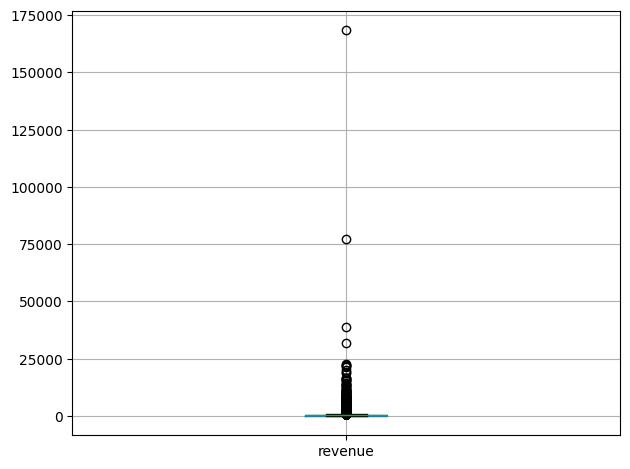

In [52]:
df.boxplot(column='revenue')
plt.tight_layout()
plt.show()

Pemeriksaan terhadap sepuluh revenue tertinggi untuk melihat outlier

In [53]:
df.sort_values(by='revenue', ascending=False).head(10)


,customerid,invoiceno,invoicedate,revenue,country
14350,16446,581483,2011-12-09,168469.60,United Kingdom
1440,12346,541431,2011-01-18,77183.60,United Kingdom
10474,15098,556444,2011-06-10,38970.00,United Kingdom
17305,17450,567423,2011-09-20,31698.16,United Kingdom
1597,12415,556917,2011-06-15,22775.93,Australia
19432,18102,572209,2011-10-21,22206.00,United Kingdom
17306,17450,567381,2011-09-20,22104.80,United Kingdom
1598,12415,563614,2011-08-18,21880.44,Australia
12353,15749,550461,2011-04-18,21535.90,United Kingdom
8838,14646,572035,2011-10-20,20277.92,Netherlands


Memisahkan df untuk rfm analisis dan df untuk analisis statistik

In [54]:
df_eda = df.copy()
df_eda.head()

,customerid,invoiceno,invoicedate,revenue,country
1440,12346,541431,2011-01-18,77183.60,United Kingdom
1441,12347,573511,2011-10-31,1294.32,Iceland
1442,12347,537626,2010-12-07,711.79,Iceland
1443,12347,549222,2011-04-07,636.25,Iceland
1444,12347,562032,2011-08-02,584.91,Iceland


Karena terdapat outlier ekstrem yang menyebabkan visualisasi box plot kolom revenue menjadi rusak dan jadi sulit untuk melihat nilai-nilai revenue dari data tersebut. Maka, saya melakukan log transform supaya bisa melihat nilai-nilai revenue tersebut dengan lebih mudah.

In [55]:
df_eda['log_revenue'] = np.log1p(df_eda['revenue'])

In [56]:
print(df_eda[['revenue', 'log_revenue']])

        revenue  log_revenue
1440   77183.60    11.253955
1441    1294.32     7.166513
1442     711.79     6.569187
1443     636.25     6.457162
1444     584.91     6.373166
...         ...          ...
19997      2.50     1.252763
19998      1.95     1.081805
19999   1001.32     6.910073
20000    765.28     6.641548
20001     70.68     4.272212

[18562 rows x 2 columns]


In [57]:
df_eda['log_revenue'].describe()

count    18562.000000
mean         5.589222
std          1.057550
min          0.322083
25%          5.067016
50%          5.716616
75%          6.157524
max         12.034517
Name: log_revenue, dtype: float64

Setelah melakukan log transform, visualisasi box plot dan histogram dilakukan pada kolom log_revenue (hasil dari log transform). Persebaran data dari nilai-nilai revenue mulai terlihat jelas dan lebih mudah diinterpretasikan. Sebagian besar revenue customer di antara 3.3(£27) hingga 7.8(£2.440), dengan konsentrasi nilai utama berada di 5 (sekitar £148) hingga 6.1 (sekitar £445). Hal ini menunjukkan bahwa sebagian besar customer memiliki nilai transaksi menengah, sedangkan titik-titik di luar whisker (outlier) hanya sedikit, yang artinya merepresentasikan sebagian kecil customer dengan transaksi yang sangat rendah atau sangat tinggi.

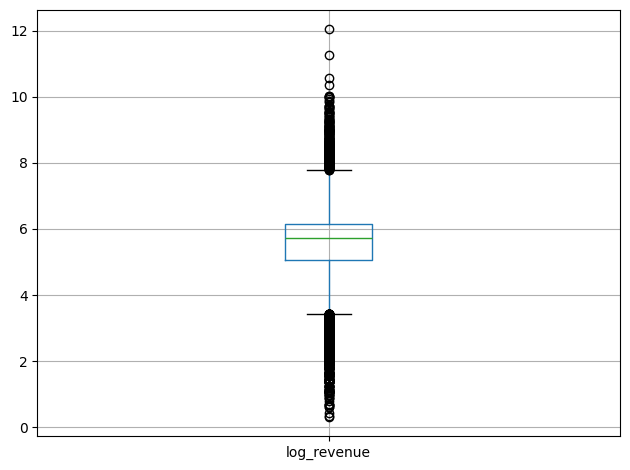

In [58]:
df_eda.boxplot(column='log_revenue')
plt.tight_layout()
plt.show()

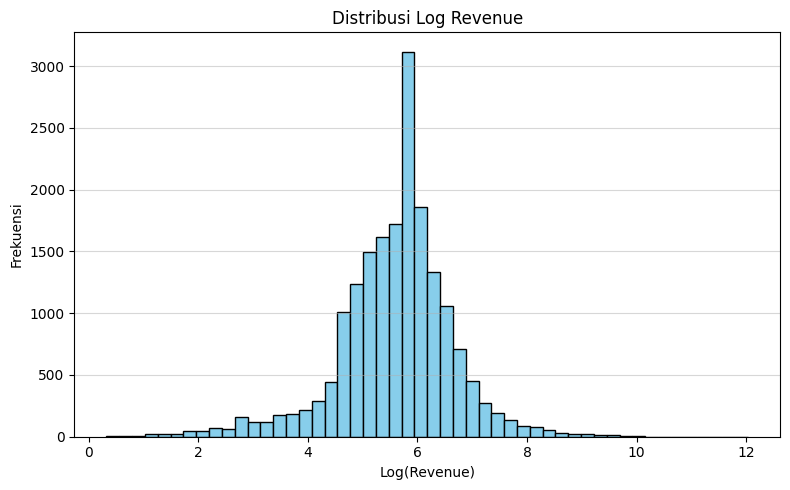

In [59]:
plt.figure(figsize=(8,5))
plt.hist(df_eda['log_revenue'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribusi Log Revenue')
plt.xlabel('Log(Revenue)')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

Tahun 2011 menunjukkan pertumbuhan revenue yang kuat dan musiman, dengan puncak di November. Penurunan drastis dari November ke Desember adalah wajar. Namun, hasil Desember 2011 yang sedikit di bawah Desember 2010 mengindikasikan bahwa meskipun tren tahunan membaik, revenue akhir tahun tidak melampaui capaian tahun sebelumnya.

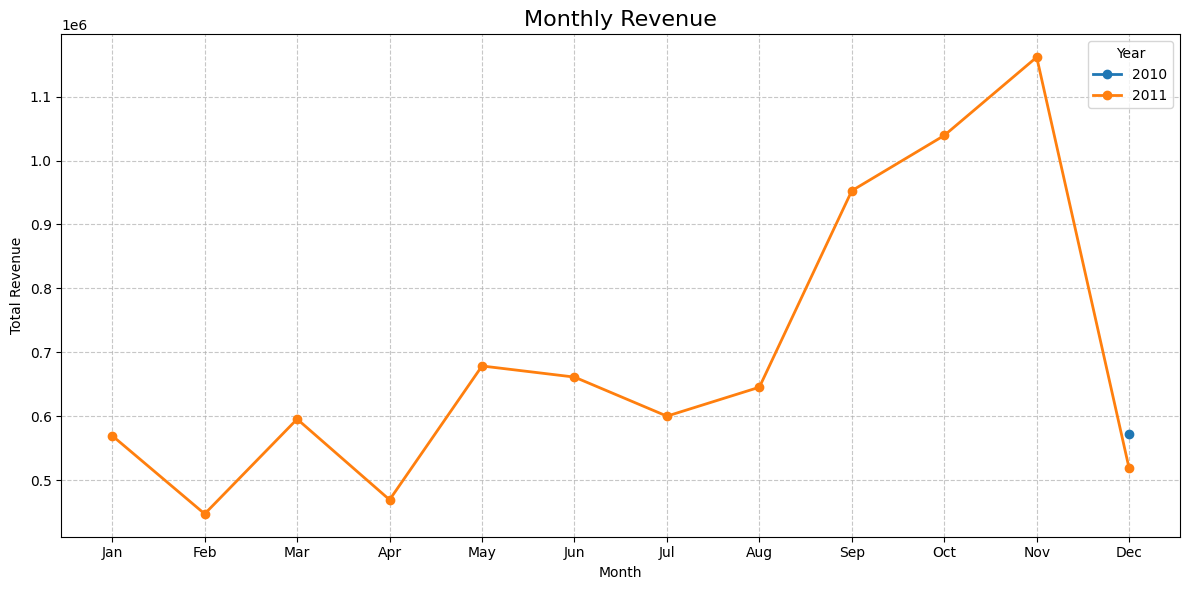

In [60]:
df_eda['year'] = df['invoicedate'].dt.year
df_eda['month'] = df['invoicedate'].dt.month 

yearly_trend = pd.pivot_table(
    df_eda,
    index='month',
    columns='year', 
    values='revenue',
    aggfunc='sum'
)

plt.figure(figsize=(12, 6))
yearly_trend.plot(kind='line', ax=plt.gca(), marker='o', linewidth=2)

plt.title('Monthly Revenue', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Revenue')

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(yearly_trend.index, [month_names[i-1] for i in yearly_trend.index], rotation=0)

plt.legend(title='Year')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Customerid 14646 menjadi customer dengan revenue terbesar sekitar £280.206.02

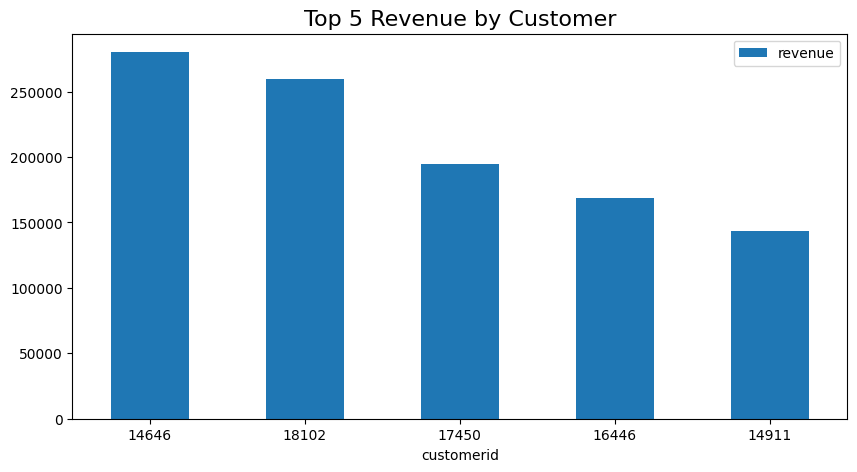

In [61]:
top_revenue_customer = pd.pivot_table(
    df_eda,
    index='customerid',
    values='revenue',
    aggfunc='sum'
).sort_values('revenue', ascending=False)

top_revenue_customer.head(5).plot(kind='bar', figsize=(10,5))
plt.title('Top 5 Revenue by Customer', fontsize=16)
plt.xticks(rotation=0, ha='center')
plt.show()

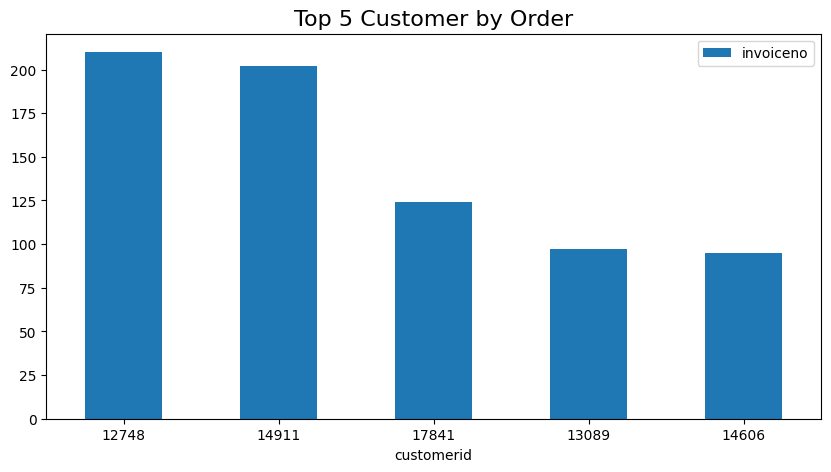

In [62]:
top_order_customer = pd.pivot_table(
    df_eda,
    index='customerid',
    values='invoiceno',
    aggfunc='count'
).sort_values('invoiceno', ascending=False)

top_order_customer.head(5).plot(kind='bar', figsize=(10,5))
plt.title('Top 5 Customer by Order', fontsize=16)
plt.xticks(rotation=0, ha='center')
plt.show()

United Kingdom menghasilkan revenue tertinggi sebesar £7.308.391,55. Hal ini wajar karena perusahaan pada dataset ini berbasis di United Kingdom dan mayoritas pelanggannya kemungkinan merupakan wholesaler lokal, sehingga transaksi dari UK jauh lebih dominan dibanding negara lain. Negara seperti Netherlands, EIRE, dan Germany berkontribusi lebih kecil karena jangkauan pasar internasional yang terbatas.

In [63]:
top_country = pd.pivot_table(
    df_eda,
    index='country',
    values='revenue',
    aggfunc='sum'
).sort_values('revenue', ascending=False)
top_country

,revenue
country,
United Kingdom,7308391.55
Netherlands,285446.34
EIRE,265545.90
Germany,228867.14
France,209024.05
Australia,138521.31
Spain,61577.11
Switzerland,56443.95
Belgium,41196.34


Korelasi antara jumlah pesanan dan total pendapatan sebesar 0.55 menandakan adanya hubungan positif sedang antara keduanya. Artinya, semakin banyak jumlah pesanan yang dilakukan customer, maka pendapatannya cenderung meningkat, meskipun tidak selalu berbanding lurus (terdapat customer dengan sedikit order namun dengan revenue besar). Temuan ini menjadi landasan awal untuk menyederhanakan segmentasi di tahap selannjutnya.

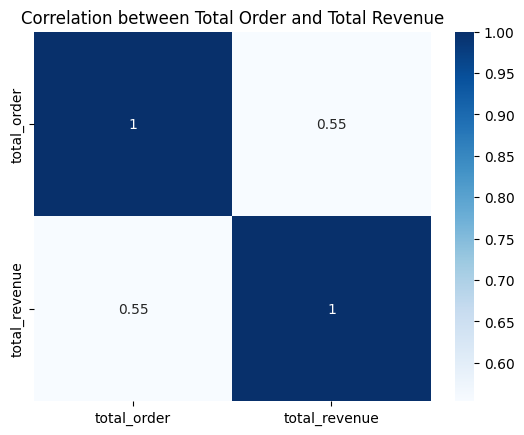

In [64]:
df_corr = df.groupby('customerid').agg({
    'invoiceno': 'nunique',
    'revenue': 'sum'
}).rename(columns={'invoiceno':'total_order', 'revenue':'total_revenue'})

sns.heatmap(df_corr.corr(), annot=True, cmap='Blues')
plt.title('Correlation between Total Order and Total Revenue')
plt.show()


# 3. RFM Analysis

Membuat variable max date + 1 day untuk perhitungan recency

In [65]:
reference_date = df['invoicedate'].max() + pd.Timedelta(days=1)

Melakukan perhitungan rfm percustomer

In [66]:
rfm = df.groupby('customerid').agg({
    'invoicedate': lambda x: (reference_date - x.max()).days,  # Recency
    'invoiceno': 'nunique',  # Frequency
    'revenue': 'sum'  # Monetary
}).reset_index()

rfm.rename(columns={'invoicedate': 'Recency',
                    'invoiceno': 'Frequency',
                    'revenue': 'Monetary'}, inplace=True)
rfm.head()

,customerid,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12347,3,7,4310.00
2,12348,76,4,1797.24
3,12349,19,1,1757.55
4,12350,311,1,334.40


Statistik deskriptif untuk melihat persebaran data pada RFM

In [67]:
rfm[['Recency','Frequency','Monetary']].describe()


,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,93.059474,4.272015,2054.266459
std,100.012264,7.697998,8989.230441
min,1.000000,1.000000,3.750000
25%,18.000000,1.000000,307.415000
50%,51.000000,2.000000,674.485000
75%,142.750000,5.000000,1661.740000
max,374.000000,209.000000,280206.020000


Visualisasi histogram pada kolom rfm untuk melihat distribusi data, supaya dapat melihat persebaran data lebih jelas dan menentukan langkah selanjutnya
1. Recency: Sebagian besar customer baru saja bertransaksi. Artinya banyak customer yang aktif baru-baru ini. Terdapat beberapa pelanggan lama yang sudah tidak melakukan transaksi.
2. Frequency: Mayoritas pelanggan melakukan jumlah transaksi yang sedikit. Namun, terdapat beberapa customer membeli berkali-kali.
3. Monetary: Sebagian besar pelanggan hanya menghabiskan sedikit uang untuk transaksi, yang mencerminkan dari rendahnya nilai frequency.

Distribusi right skewed yang ekstrem pada Frequency dan Monetary ini adalah yang menentukan langkah selanjutnya. Ini berarti ada nilai outlier ekstrem yang membuat segmentasi berdasarkan nilai pasti akan gagal, hampir semua pelanggan akan menumpuk di Skor 1. Oleh karena itu, saya menggunakan pembagian quantile. Supaya pembagian skor rfmnya tepat sasaran.

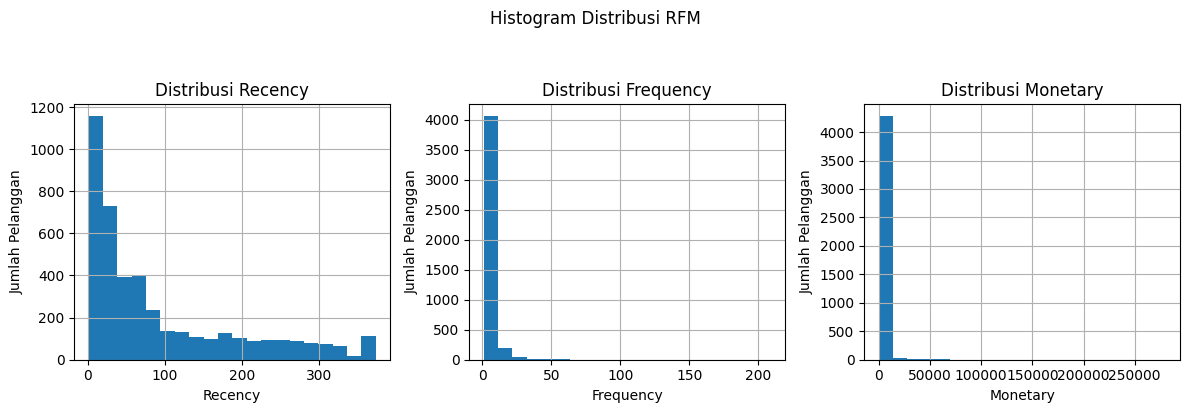

In [68]:
ax = rfm[['Recency', 'Frequency', 'Monetary']].hist(
    figsize=(12, 4), 
    layout=(1, 3),   
    bins=20        
)

plt.suptitle('Histogram Distribusi RFM', y=1.02)
for i, col in enumerate(['recency', 'frequency', 'monetary']):
    ax.flat[i].set_title(f'Distribusi {col.capitalize()}')
    ax.flat[i].set_xlabel(col.capitalize())
    ax.flat[i].set_ylabel('Jumlah Pelanggan')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Saya melakukan segmentasi menggunakan quantile pada kolom Recency, Frequency, dan Monetary.

Untuk Frequency dan Monetary, quantile adalah wajib karena outlier ekstrem akan merusak analisis. Untuk mengatasi ribuan nilai duplikat (misal, Frequency=1) yang akan membuat qcut error, saya menggunakan .rank(method='first')` terlebih dahulu.

Lalu, saya memberi skor 1-5, dengan catatan khusus untuk Recency di mana skornya dibalik (`[5,4,3,2,1]`), karena nilai yang rendah (terbaru) justru yang terbaik (Skor 5)."

In [69]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])
rfm.head()

,customerid,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,12346,326,1,77183.60,1,1,5
1,12347,3,7,4310.00,5,5,5
2,12348,76,4,1797.24,2,4,4
3,12349,19,1,1757.55,4,1,4
4,12350,311,1,334.40,1,1,2


Menggabungkan skor menjadi satu skor gabungan. Tipe data category pada kolom yang ingin dijumlahkan diubah menjadi str agar dapat digabungkan, sehingga menghasilkan nilai seperti '115, '555', '244', dan lain-lain.

In [70]:
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + \
                   rfm['F_Score'].astype(str) + \
                   rfm['M_Score'].astype(str)
rfm.head()

,customerid,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346,326,1,77183.60,1,1,5,115
1,12347,3,7,4310.00,5,5,5,555
2,12348,76,4,1797.24,2,4,4,244
3,12349,19,1,1757.55,4,1,4,414
4,12350,311,1,334.40,1,1,2,112


Pengecekan korelasi antara Frequency dan Monetary untuk kebutuhan segmentasi RFM

Scatter plot ini memvisualisasikan data mentah Frequency vs Monetary secara langsung. Akibat data yang right skewed membuat visualisasi menjadi tidak informatif, hampir semua titik data menumpuk rapat di pojok kiri bawah akibat outlier. Maka dari itu, saya melakukan log transform pada kedua kolom supaya dapat melihat pola dan persebaran data antara keduanya.

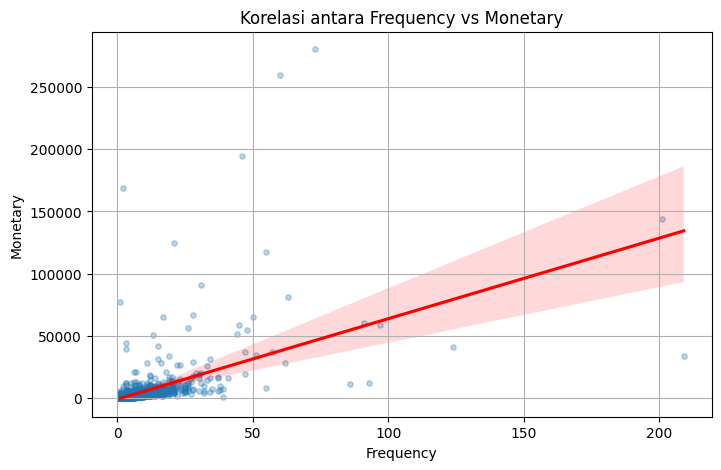

In [71]:
plt.figure(figsize=(8, 5))
sns.regplot(
    data=rfm, 
    x='Frequency', 
    y='Monetary',
    scatter_kws={'alpha': 0.3, 's': 15},  
    line_kws={'color': 'red'}             
)

plt.title('Korelasi antara Frequency vs Monetary')
plt.grid(True)
plt.show()

Setelah dilakukan log transform pada kedua kolom, visualisasi ini menjadi informatif. Ini membuktikan adanya korelasi kuat antara Frequency dan Monetary, yang artinya bahwa pelanggan yang sering membeli juga cenderung menghabiskan banyak uang.

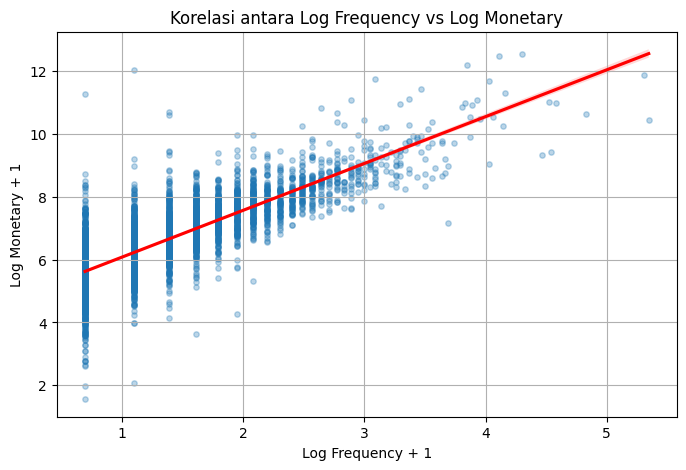

In [72]:
rfm_plot = rfm.copy()
rfm_plot['log_F'] = np.log(rfm_plot['Frequency'] + 1)
rfm_plot['log_M'] = np.log(rfm_plot['Monetary'] + 1)

plt.figure(figsize=(8, 5))
sns.regplot(
    data=rfm_plot, 
    x='log_F', 
    y='log_M',
    scatter_kws={'alpha': 0.3, 's': 15},  
    line_kws={'color': 'red'}             
)

plt.title('Korelasi antara Log Frequency vs Log Monetary')
plt.xlabel('Log Frequency + 1')
plt.ylabel('Log Monetary + 1')
plt.grid(True)
plt.show()

# 3.1 Pembuatan segmentasi customer (Champions, At Risk, dan lain-lain).

Plot korelasi sebelumnya membuktikan bahwa pelanggan yang sering membeli, hampir pasti menghabiskan banyak uang. Karena F dan M sangat mirip, jadi segmentasi lebih banyak fokus ke R dan F. Bukan karena M tidak penting, tetapi karena F sudah mewakilinya dengan baik.



In [73]:
segment_map = {
    r'^[54][54].*': 'Champions',             # R=5/4, F=5/4
    r'^[54][34].*': 'Loyal Customers',       # R=5/4, F=3/4
    r'^3[45].*': 'Potential Loyalists (F)', # R=3, F=4/5 (Dulu sering, mulai jarang)
    r'^[45].*[45]$': 'Potential Loyalists (M)', # R=4/5, M=4/5 (Baru, belanja besar)
    r'^5[12].*': 'New Customers',             # R=5, F=1/2
    r'^4[12].*': 'Promising',                 # R=4, F=1/2
    r'^3[123].*': 'Needs Attention',           # R=3, F=1-3 (Mulai tidur)
    r'^[12][345].*': 'At Risk',                 # R=1/2, F=3-5 (Dulu loyal, kini hilang)
    r'^[12][12].*': 'Lost'                     # R=1/2, F=1/2
}

rfm['Segment'] = rfm['RFM_Score'].replace(segment_map, regex=True)

rfm['Segment'] = rfm['Segment'].apply(lambda x: 'Others' if x.isdigit() else x)
rfm.head()

,customerid,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346,326,1,77183.60,1,1,5,115,Lost
1,12347,3,7,4310.00,5,5,5,555,Champions
2,12348,76,4,1797.24,2,4,4,244,At Risk
3,12349,19,1,1757.55,4,1,4,414,Potential Loyalists (M)
4,12350,311,1,334.40,1,1,2,112,Lost


Setelah pembuatan segmentasi, visualisasi Treemap menunjukkan polarisasi ekstrem antara segmen Champions (1128 customer) dan Lost (1071 customer) sebagai dua kelompok terbesar. Besarnya segmen At Risk (656 customer) di posisi ketiga juga menjadi sinyal peringatan akan potensi churn lanjutan yang harus segera ditangani.

Di sisi lain, potensi pertumbuhan terlihat pada segmen New Customers, Promising, dan Potential Loyalists (M). Meskipun jumlahnya belum dominan, mereka adalah bibit loyalitas baru yang harus dipupuk agar tidak turun kelas. Perhatian khusus juga perlu diberikan pada Potential Loyalists (F) untuk mengaktifkan kembali frekuensi belanja mereka sebelum merosot menjadi Needs Attention.

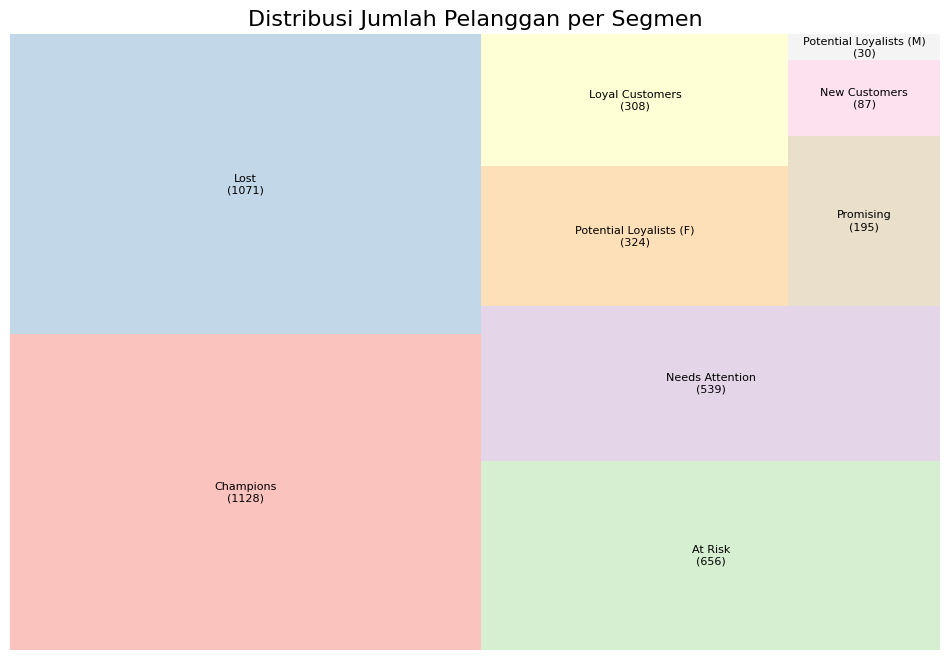

In [74]:
segment_counts = rfm['Segment'].value_counts()

labels = [f'{s}\n({v})' for s, v in segment_counts.items()]
sizes = segment_counts.values 

colors = [plt.cm.Pastel1(i) for i in np.linspace(0, 1, len(segment_counts))]

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=sizes, 
    label=labels, 
    alpha=0.8,
    pad=False,
    color=colors,
    text_kwargs={'fontsize': 8, 'color': 'black'} 
)
plt.title('Distribusi Jumlah Pelanggan per Segmen', fontsize=16)
plt.axis('off') 
plt.show()

Prioritas pertama terdapat pada segmen At Risk. Kenapa? 
1. Karena segmen At Risk adalah potensi terbesar customer akan churn. 
2. Membiarkan mereka churn adalah kerugian finansial yang besar, karena rata-rata monetary dan populasi mereka relatif besar.

Selain strategi defensif tersebut, fokus ofensif harus diarahkan pada program apresiasi untuk menjaga loyalitas Champions dan Loyal Customers. Sementara untuk segmen pertumbuhan lainnya, strategi harus difokuskan pada insentif yang mendorong frekuensi pembelian agar mereka naik kelas menjadi customer loyal.

Rata-rata RFM per Segmen:
                   Segment  Recency  Frequency  Monetary
1                Champions    13.62      10.03   5219.39
6  Potential Loyalists (F)    49.97       5.72   2467.36
7  Potential Loyalists (M)    17.00       1.73   1606.46
3          Loyal Customers    16.53       2.34   1331.05
0                  At Risk   151.79       3.41   1248.91
4          Needs Attention    53.01       1.57    619.66
2                     Lost   217.61       1.10    488.64
5            New Customers     7.72       1.25    344.78
8                Promising    23.95       1.16    306.35


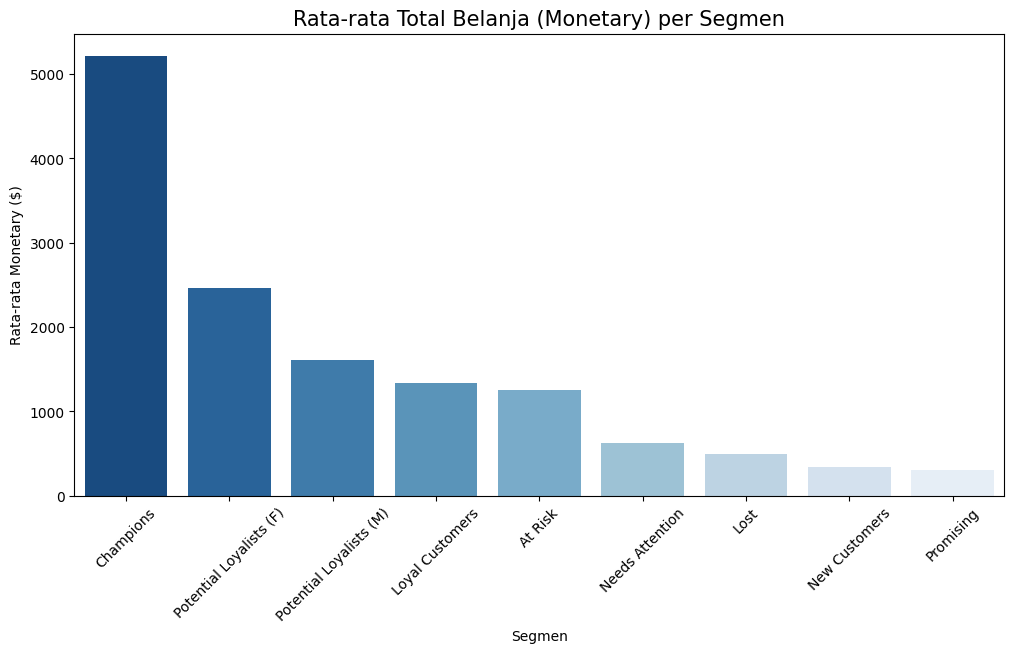

In [75]:
segment_analysis = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

segment_analysis = segment_analysis.sort_values(by='Monetary', ascending=False)

print("Rata-rata RFM per Segmen:")
print(segment_analysis.round(2))

plt.figure(figsize=(12, 6))
sns.barplot(
    data=segment_analysis, 
    x='Segment', 
    y='Monetary', 
    hue='Segment',  
    legend=False,  
    palette='Blues_r'
)
plt.title('Rata-rata Total Belanja (Monetary) per Segmen', fontsize=15)
plt.ylabel('Rata-rata Monetary ($)')
plt.xlabel('Segmen')
plt.xticks(rotation=45) 
plt.show()

Visualisasi ini berfungsi sebagai bukti validasi akhir bahwa pembagian segmen yang dilakukan sudah tepat dan akurat.

Plot ini memperlihatkan pola yang sangat logis. Pelanggan terbaik (Champions) dan customer yang sudah pergi (Lost) terpisah jauh di dua ujung yang berlawanan. Ini menandakan segmentasi sukses membedakan antara customer prioritas dan non-potensial secara tegas.

Yang paling krusial, segmen (At Risk) terlihat jelas di zona bahaya. Mereka memiliki transaksi yang tinggi, namun angka Recencynya makin membesar (sudah lama tidak kembali). Ketepatan deteksi ini memastikan bahwa nantinya target program retensi valid dan tepat sasaran.

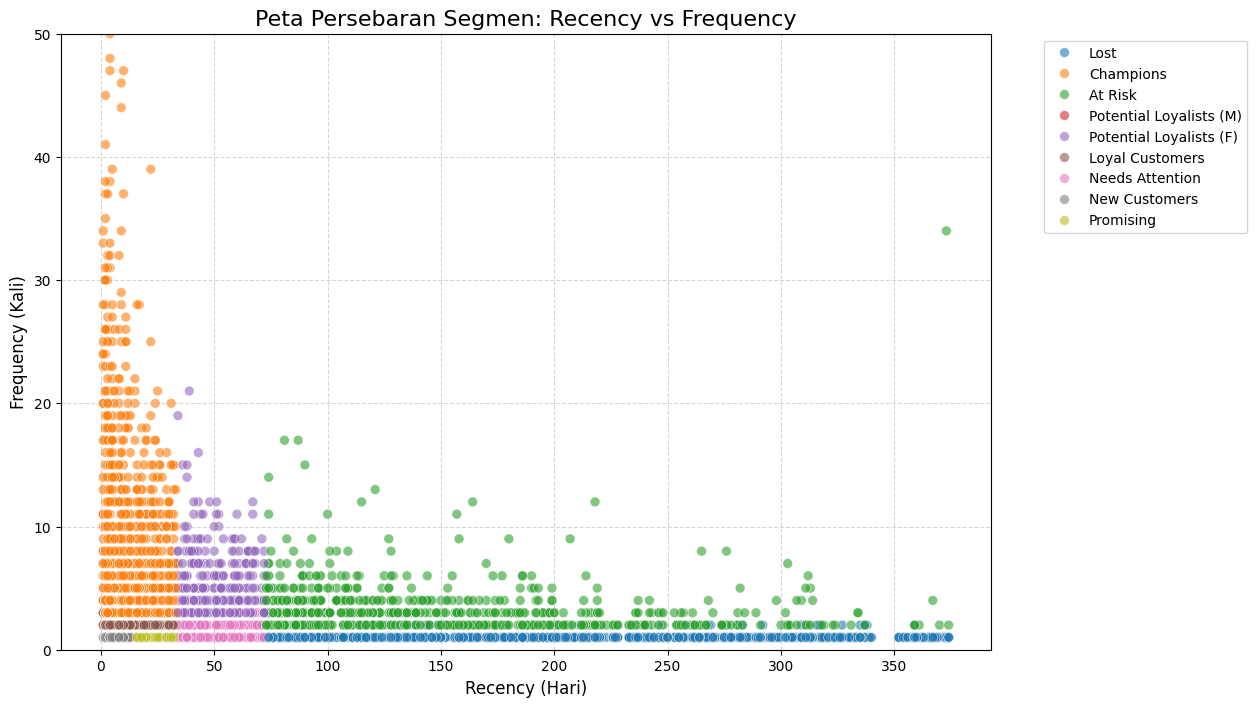

In [76]:
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=rfm,
    x='Recency',
    y='Frequency',
    hue='Segment',
    palette='tab10', 
    s=50,            
    alpha=0.6        
)

plt.title('Peta Persebaran Segmen: Recency vs Frequency', fontsize=16)
plt.xlabel('Recency (Hari)', fontsize=12)
plt.ylabel('Frequency (Kali)', fontsize=12)

plt.ylim(0, 50) 

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [77]:
rfm

,customerid,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346,326,1,77183.60,1,1,5,115,Lost
1,12347,3,7,4310.00,5,5,5,555,Champions
2,12348,76,4,1797.24,2,4,4,244,At Risk
3,12349,19,1,1757.55,4,1,4,414,Potential Loyalists (M)
4,12350,311,1,334.40,1,1,2,112,Lost
...,...,...,...,...,...,...,...,...,...
4333,18280,278,1,180.60,1,2,1,121,Lost
4334,18281,181,1,80.82,1,2,1,121,Lost
4335,18282,8,2,178.05,5,3,1,531,Loyal Customers
4336,18283,4,16,2094.88,5,5,5,555,Champions


In [78]:
rfm.to_csv('rfm_segmentation_final1.csv', index=False)